In [1]:
import numpy as np
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
df = pd.read_csv('/content/data_clean.csv', encoding='latin-1')


In [3]:
def classify(hs):
    retval = ""
    if int(hs) == 1:
        retval = 'Ujaran Kebencian'
    else:
        retval = 'Bukan Ujaran Kebencian'
    return retval

df['HS'] = df['HS'].apply(classify)

def classify(abusive):
    retval = ""
    if int(abusive) == 1:
        retval = 'Abusive'
    else:
        retval = 'Not Abusive'
    return retval

df['Abusive'] = df['Abusive'].apply(classify)

In [4]:
print(df)

                                                    text  \
0      - disaat semua cowok berusaha melacak perhatia...   
1      RT USER: USER siapa yang telat ngasih tau elu?...   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   
4      USER USER Kaum cebong kapir udah keliatan dong...   
...                                                  ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   
13165                       USER Kasur mana enak kunyuk'   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   
13167  USER USER USER USER Bom yang real mudah terdet...   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   

                                              text_clean  \
0      cowok berusaha melacak perhatian gue lantas re...   
1      telat tau edan sarap gue bergaul cigax jifla c...   
2      41 kadang berpikir percaya tuhan jatuh berkali...   
3                                    ku

In [5]:
df.head()

,text,text_clean,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,cowok berusaha melacak perhatian gue lantas re...,Ujaran Kebencian,Abusive,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,telat tau edan sarap gue bergaul cigax jifla c...,Bukan Ujaran Kebencian,Abusive,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang berpikir percaya tuhan jatuh berkali...,Bukan Ujaran Kebencian,Not Abusive,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,ku tau matamu sipit,Bukan Ujaran Kebencian,Not Abusive,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kafir dongoknya dungu haha,Ujaran Kebencian,Abusive,0,1,1,0,0,0,0,0,1,0


In [6]:
df.tail()

,text,text_clean,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,berbicara ndasmu congor sekata anjing,Ujaran Kebencian,Abusive,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',kasur enak kunyuk,Bukan Ujaran Kebencian,Abusive,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati bisu bosan duh,Bukan Ujaran Kebencian,Not Abusive,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,bom real mudah terdeteksi bom terkubur dahsyat...,Bukan Ujaran Kebencian,Not Abusive,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",situ foto ya kutil onta,Ujaran Kebencian,Abusive,1,0,0,0,0,0,1,1,0,0


In [7]:
df.shape

(13169, 14)

In [8]:
df.duplicated().sum()

125

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
df.isna().sum()

text              0
text_clean       22
HS                0
Abusive           0
HS_Individual     0
HS_Group          0
HS_Religion       0
HS_Race           0
HS_Physical       0
HS_Gender         0
HS_Other          0
HS_Weak           0
HS_Moderate       0
HS_Strong         0
dtype: int64

In [11]:
df.isna().sum()/df.shape[0]

text             0.000000
text_clean       0.001687
HS               0.000000
Abusive          0.000000
HS_Individual    0.000000
HS_Group         0.000000
HS_Religion      0.000000
HS_Race          0.000000
HS_Physical      0.000000
HS_Gender        0.000000
HS_Other         0.000000
HS_Weak          0.000000
HS_Moderate      0.000000
HS_Strong        0.000000
dtype: float64

In [12]:
df ['total_char'] = df.text.apply(len)
df['total_word'] = df.text.apply(lambda sent: len(sent.split()))

In [13]:
df.mean()

<ipython-input-13-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


HS_Individual      0.271389
HS_Group           0.151641
HS_Religion        0.060488
HS_Race            0.043162
HS_Physical        0.024686
HS_Gender          0.023306
HS_Other           0.284115
HS_Weak            0.256670
HS_Moderate        0.130175
HS_Strong          0.036185
total_char       114.208448
total_word        17.264259
dtype: float64

In [14]:
df.median()

<ipython-input-14-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


HS_Individual      0.0
HS_Group           0.0
HS_Religion        0.0
HS_Race            0.0
HS_Physical        0.0
HS_Gender          0.0
HS_Other           0.0
HS_Weak            0.0
HS_Moderate        0.0
HS_Strong          0.0
total_char       100.0
total_word        15.0
dtype: float64

In [15]:
df['total_char'].mode()

0    254
dtype: int64

In [16]:
df['total_word'].mode()

0    11
dtype: int64

In [17]:
range_char = df.total_char.max() - df.total_char.min()
range_char

557

In [18]:
range_word = df.total_word.max() - df.total_word.min()
range_word

51

In [19]:
p0 = df.total_char.min()
p100 = df.total_char.max()
q1 = df.total_char.quantile(0.25)
q2 = df.total_char.quantile(0.5)
q3 = df.total_char.quantile(0.75)
iqr = q3 - q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

print("batas bawah 'total_char':", lower_limit)
print("nilai minimum", p0)
if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")
print()
print("batas atas 'total_char", upper_limit)
print("nilai maksimum", p100)
if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

batas bawah 'total_char': -80.5
nilai minimum 4
Tidak ada outlier dari sisi batas bawah

batas atas 'total_char 291.5
nilai maksimum 561
Ada outlier dari sisi batas atas


In [20]:
p0 = df.total_word.min()
p100 = df.total_word.max()
q1 = df.total_word.quantile(0.25)
q2 = df.total_word.quantile(0.5)
q3 = df.total_word.quantile(0.75)
iqr = q3 - q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

print("batas bawah 'total_word':", lower_limit)
print("nilai minimum", p0)
if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")
print()
print("batas atas 'total_word", upper_limit)
print("nilai maksimum", p100)
if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

batas bawah 'total_word': -12.0
nilai minimum 1
Tidak ada outlier dari sisi batas bawah

batas atas 'total_word 44.0
nilai maksimum 52
Ada outlier dari sisi batas atas


In [21]:
df.var()

<ipython-input-21-28ded241fd7c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


HS_Individual       0.197752
HS_Group            0.128656
HS_Religion         0.056833
HS_Race             0.041302
HS_Physical         0.024078
HS_Gender           0.022764
HS_Other            0.203409
HS_Weak             0.190805
HS_Moderate         0.113238
HS_Strong           0.034879
total_char       4785.271504
total_word        104.910534
dtype: float64

In [22]:
df.std()

<ipython-input-22-ce97bb7eaef8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


HS_Individual     0.444693
HS_Group          0.358686
HS_Religion       0.238397
HS_Race           0.203229
HS_Physical       0.155171
HS_Gender         0.150879
HS_Other          0.451009
HS_Weak           0.436812
HS_Moderate       0.336509
HS_Strong         0.186758
total_char       69.175657
total_word       10.242584
dtype: float64

In [23]:
df.skew()

<ipython-input-23-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


HS_Individual    1.028331
HS_Group         1.942718
HS_Religion      3.687795
HS_Race          4.496498
HS_Physical      6.127256
HS_Gender        6.319885
HS_Other         0.957487
HS_Weak          1.114289
HS_Moderate      2.198351
HS_Strong        4.967777
total_char       0.697363
total_word       0.789820
dtype: float64

In [24]:
df.kurtosis()

<ipython-input-24-c7edf97eb14c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


HS_Individual    -0.942681
HS_Group          1.774426
HS_Religion      11.601608
HS_Race          18.221291
HS_Physical      35.548712
HS_Gender        37.946761
HS_Other         -1.083385
HS_Weak          -0.758476
HS_Moderate       2.833181
HS_Strong        22.682291
total_char       -0.385803
total_word       -0.151707
dtype: float64

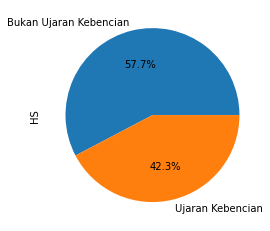

In [30]:
df.groupby('HS').HS.count().plot(kind='pie', autopct='%1.1f%%')


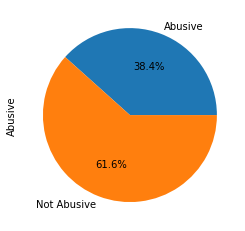

In [31]:
df.groupby('Abusive').Abusive.count().plot(kind='pie', autopct='%1.1f%%')

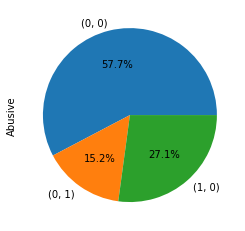

In [32]:
df.groupby(by=["HS_Individual", "HS_Group"]).Abusive.count().plot(kind='pie', autopct='%1.1f%%')

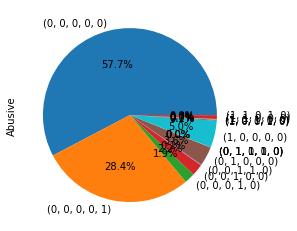

In [33]:
df.groupby(by=["HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other"]).Abusive.count().plot(kind='pie', autopct='%1.1f%%')

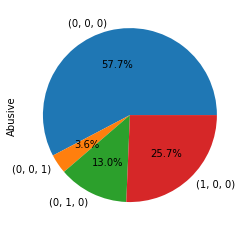

In [34]:
df.groupby(by=["HS_Weak", "HS_Moderate", "HS_Strong"]).Abusive.count().plot(kind='pie', autopct='%1.1f%%')

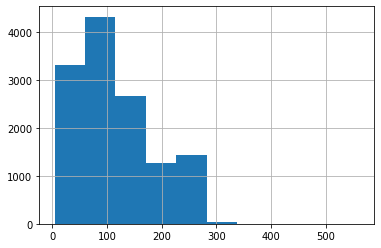

In [35]:
df.total_char.hist()

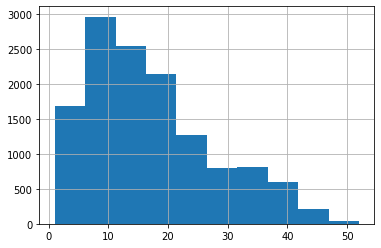

In [36]:
df.total_word.hist()

In [37]:
text_clean = ' '.join(df['text_clean'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

TypeError: ignored

In [38]:
df.corr()

,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
HS_Individual,1.000000,-0.258028,0.033899,-0.000672,0.214011,0.183402,0.636195,0.962826,-0.236100,0.058995,-0.141034,-0.119116
HS_Group,-0.258028,1.000000,0.366139,0.342486,-0.009406,0.021111,0.224657,-0.248436,0.915018,0.238550,-0.030375,-0.029356
HS_Religion,0.033899,0.366139,1.000000,0.094862,-0.003061,0.024751,-0.159848,0.033490,0.345290,0.083432,-0.005204,0.004380
HS_Race,-0.000672,0.342486,0.094862,1.000000,-0.028927,-0.020306,-0.133800,-0.007345,0.238469,0.243672,-0.057009,-0.048205
HS_Physical,0.214011,-0.009406,-0.003061,-0.028927,1.000000,0.054019,-0.100225,0.220971,0.000123,-0.025535,-0.043778,-0.035267
HS_Gender,0.183402,0.021111,0.024751,-0.020306,0.054019,1.000000,-0.097315,0.190753,0.027826,-0.019047,-0.025897,-0.018621
HS_Other,0.636195,0.224657,-0.159848,-0.133800,-0.100225,-0.097315,1.000000,0.605078,0.225597,0.124610,-0.109935,-0.101147
HS_Weak,0.962826,-0.248436,0.033490,-0.007345,0.220971,0.190753,0.605078,1.000000,-0.227323,-0.113858,-0.131912,-0.108383
HS_Moderate,-0.236100,0.915018,0.345290,0.238469,0.000123,0.027826,0.225597,-0.227323,1.000000,-0.074958,-0.004743,-0.006556
HS_Strong,0.058995,0.238550,0.083432,0.243672,-0.025535,-0.019047,0.124610,-0.113858,-0.074958,1.000000,-0.077081,-0.074699


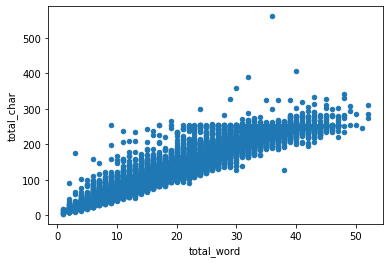

In [39]:
df.plot(x='total_word',y='total_char',kind='scatter')

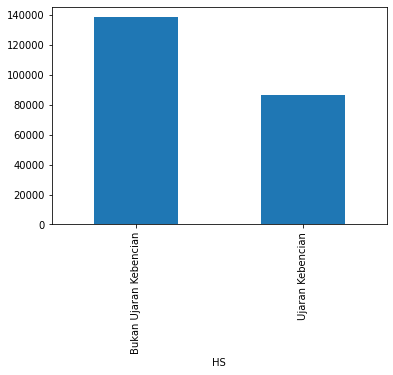

In [41]:
df.groupby('HS').total_word.sum().plot(kind='bar')

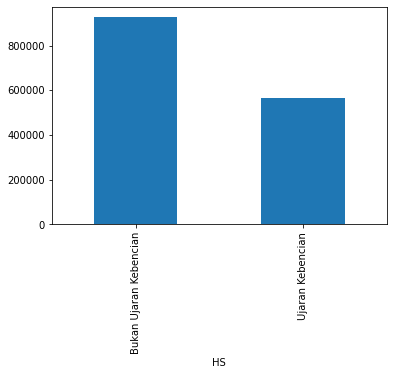

In [42]:
df.groupby('HS').total_char.sum().plot(kind='bar')

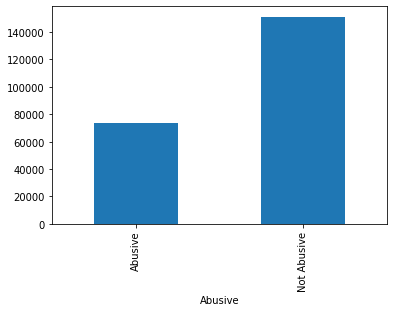

In [43]:
df.groupby('Abusive').total_word.sum().plot(kind='bar')

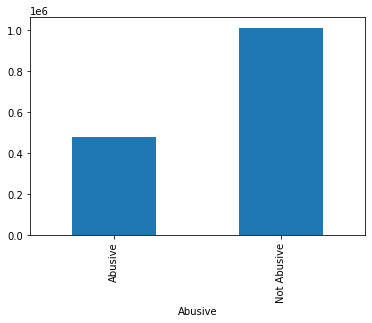

In [44]:
df.groupby('Abusive').total_char.sum().plot(kind='bar')